# 12.3 The Kernel Trick

You can toggle the code on and off in this presentation via the button below.

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

- This crucial issue, of not being able to effectively store and compute with high dimensional fixed-shape feature transformations, motivates notion of *kernelization*. 

- Kernelization not only allows us to avoid this scaling problem, but also provides a way of generating new fixed-shape features defined solely through such a kernelized representation.

##  A useful fact from the fundamental theorem of linear algebra

Before discussing the concept of kernelization, it will be helpful to first recall a useful proposition from the fundamental theorem of linear algebra about decomposition of any vector $\boldsymbol{\omega}$ in $\mathbb{R}^M$ over the columns of a given $M \times P$ matrix $\mathbf{F}$. Denoting the $p^{th}$ column of $\mathbf{F}$ as $\mathbf{f}_p$, when $\boldsymbol{\omega}$ happens to lie *inside* the column space of $\mathbf{F}$ we can express it, via a linear combination of these columns, as 

\begin{equation}
\boldsymbol{\omega} = \sum_{p=1}^{P} \mathbf{f}_p\,z_p
\end{equation}

where $z_p$ is the weight associated with $\mathbf{f}_p$. By stacking these weights into a $P \times 1$  column vector $\mathbf{z}$ we can write this relationship more compactly as

\begin{equation}
\boldsymbol{\omega} = \mathbf{F}\mathbf{z}
\end{equation}

If, on the other hand, $\boldsymbol{\omega}$ happens to lie *outside* the column space of $\mathbf{F}$, as illustrated pictorially in Figure 1, we can decompose it into two pieces: the portion of $\boldsymbol{\omega}$ belonging to the subspace spanned by the columns of $\mathbf{F}$ and an orthogonal component $\mathbf{r}$

\begin{equation}
\boldsymbol{\omega} = \mathbf{F}\mathbf{z}+\mathbf{r}
\end{equation}

Note that $\mathbf{r}$ being orthogonal to the span of columns in $\mathbf{F}$ means, algebraically, that $\mathbf{F}^T\mathbf{r}=\mathbf{0}_{P \times 1}$. Moreover when $\boldsymbol{\omega}$ is in the column space of $\mathbf{F}$, we can still decompose it using the form given in Equation(?) by setting $\mathbf{r}=\mathbf{0}_{M \times 1}$, which clearly satisfies the orthogonality condition $\mathbf{F}^T\mathbf{r}=\mathbf{0}_{P \times 1}$. As we will now see this simple decomposition is the key to representing fixed-shape features more effectively.     

Any vector $\boldsymbol{\omega}$ in an $M$-dimensional space can be decomposed over the column space of a given matrix $\mathbf{F}$, as 

$$\boldsymbol{\omega} = \mathbf{F}\mathbf{z}+\mathbf{r}.$$

The vector $\mathbf{F}\mathbf{z}$ belongs in the subspace determined by the columns of $\mathbf{F}$ while $\mathbf{r}$ is orthogonal to this subspace.

<img src= '../../mlrefined_images/kernel_images/Fig_7_1.png' width="40%"/>



##  Kerenlizing machine learning cost functions

Here we provide several fundamental examples of how to kernelize standard supervised machine learning problems and their cost functions, including Least Squares regression, the Softmax cost for two-class classification.  Virtually all machine learning cost functions can be kernelized following arguments similar to these, including multi-class classification (see exercises), Principal Component Analysis [citation ???], and K-means clustering [citation ???].

Throughout these examples we will assume we to have $P$ with $p^{th}$ input $\mathbf{x}_p$, having arbitrary dimension $N$, and possible corresponding output $y_p$ (depending on whether a supervised or unsupervised cost is discussed).  We will also suppose that for modeling purposes $B$ units from the a *single family of kernels*  $f_1,\,f_2,\,...,f_B$ have been chosen (e.g., these could be $B$ polynomial units, or units from the Fourier family, etc.,).

#### <span style="color:#a50e3e;">Example.</span> Kernelizing regression via the Least Squares cost

Suppose we want to perform a generic nonlinear regression using $B$ units and the corresponding model evaluated at the $p^{th}$ input $\mathbf{x}_p$ 

\begin{equation}
\text{model}\left(\mathbf{x}_p,\mathbf{w}\right) = w_0 + f_1\left(\mathbf{x}_p\right)w_1 + f_2\left(\mathbf{x}_p\right)w_2 + \cdots + f_B\left(\mathbf{x}_p\right)w_B.
\end{equation}

Using the compact notation

\begin{equation}
b = w_0 \,\,\,\,\,\,\, \,\,\,\,\,\, \boldsymbol{\omega} = 
\begin{bmatrix}
w_1 \\
w_2 \\ 
\vdots \\
w_N
\end{bmatrix}\,\,\,\,\,\,\, \,\,\,\,\,\, 
\mathbf{f}_{p}=\begin{bmatrix}
f_1\left(\mathbf{x}_p\right)\\
f_2\left(\mathbf{x}_p\right)\\
\vdots\\
f_B\left(\mathbf{x}_p\right)
\end{bmatrix}
\end{equation}

we can write our model more compactly - exposing the features apart from our bias - as

\begin{equation}
\text{model}\left(\mathbf{x}_p,b,\boldsymbol{\omega}\right) = b + \mathbf{f}_p^T\boldsymbol{\omega}
\end{equation}

In this notation our Least Squares cost for regression takes the form 

\begin{equation}
g\left(b,\boldsymbol{\omega}\right) = \sum_{p=1}^{P} \left(b+\mathbf{f}_p^T\boldsymbol{\omega}-y_p\right)^2.
\end{equation}

Denote by $\mathbf{F}$ the $B \times P$ matrix $\mathbf{F}$ formed by stacking the vectors $\mathbf{f}_p$ column-wise. Now, employing the fundamental theorem of linear algebra discussed above we may write $\mathbf{w}$ here as

\begin{equation}
\boldsymbol{\omega} = \mathbf{F}\mathbf{z}+\mathbf{r}
\end{equation}

where $\mathbf{r}$ satisfies $\mathbf{F}^T\mathbf{r}=\mathbf{0}_{P \times 1}$.  

Plugging this representation of $\mathbf{w}$ back into the cost function then gives

\begin{equation}
\sum_{p=1}^{P} \left(b+\mathbf{f}_p^T\left(\mathbf{F}\mathbf{z}+\mathbf{r}\right)-y_p\right)^2 = \sum_{p=1}^{P} \left(b+\mathbf{f}_p^T\mathbf{F}\mathbf{z}-y_p\right)^2 
\end{equation}

Finally, denoting the symmetric $P\times P$ *kernel matrix* $\mathbf{H} = \mathbf{F}^T\mathbf{F}$ (and where $\mathbf{h}_p = \mathbf{F}^T\mathbf{f}_p$ is the $p^{th}$ column of this matrix), referred to as a *kernel matrix* or just the *kernel*, our original cost function becomes equivalently

\begin{equation}
g\left(b,\mathbf{z}\right) = \sum_{p=1}^{P} \left(b+\mathbf{h}_p^T\mathbf{z}-y_p\right)^2
\end{equation}

Our corresponding model evaluated at the $p^{th}$ input now takes the form

\begin{equation}
\text{model}\left(\mathbf{x}_p,b,\mathbf{z}\right) = b + \mathbf{h}_p^T\mathbf{z}.
\end{equation}

Note that we have changed the arguments of the cost function from $g\left(b,\mathbf{w}\right)$ to $g\left(b,\mathbf{z}\right)$ due to our substitution of $\boldsymbol{\omega}$. 


Following the pattern shown here we can kernelize eseentially any machine learning cost function.

#### <span style="color:#a50e3e;">Example 2. </span> Kernelizing two-class classification via the softmax cost

Writing our generic two-class Softmax cost using the same notation as employed in the previous Example we have

\begin{equation}
g\left(b,\boldsymbol{\omega}\right)=\underset{p=1}{\overset{P}{\sum}}\mbox{log}\left(1+e^{-y_{p}\left(b+\mathbf{f}_{p}^{T}\boldsymbol{\omega}\right)}\right)
\end{equation}

Using the fundamental theorem of linear algebra for any $\boldsymbol{\omega}$
we can then write $\boldsymbol{\omega}=\mathbf{F}\mathbf{z}+\mathbf{r}$ where
$\mathbf{F}^{T}\mathbf{r}=\mathbf{0}_{P\times1}$. Making this substitution
into the above and simplifying gives

\begin{equation}
g\left(b,\mathbf{z}\right)=\begin{aligned}\underset{p=1}{\overset{P}{\sum}}\mbox{log}\left(1+e^{-y_{p}\left(b+\mathbf{f}_{p}^{T}\mathbf{F}\mathbf{z}\right)}\right)\end{aligned}
\end{equation}

and denoting the $P\times P$ kernel matrix $\mathbf{H}=\mathbf{F}^{T}\mathbf{F}$
(where $\mathbf{h}_{p}=\mathbf{F}^{T}\mathbf{f}_{p}$ is the $p^{th}$
column of $\mathbf{H}$) we can then write the above in kernelized
form as

\begin{equation}
g\left(b,\mathbf{z}\right)=\begin{aligned}\underset{p=1}{\overset{P}{\sum}}\mbox{log}\left(1+e^{-y_{p}\left(b+\mathbf{h}_{p}^{T}\mathbf{z}\right)}\right)\end{aligned}
\end{equation}

This kernelized form of the Softmax is often referred to as *kernelized logistic regression* or *kernelized support vector machines*.

Using the same sort of argument, we may kernelize many machine learning problems, summarized for convenience in the table below.

<img src= '../../mlrefined_images/kernel_images/kernels.png' width="60%"/>


## Popular kernels

The real value of kernelizing any machine learning cost is that the kernel matrix $\mathbf{H}=\mathbf{F}^T\mathbf{F}$  may be constructed *without* first building the matrix $\mathbf{F}$, as we will see through the examples below. 

#### <span style="color:#a50e3e;">Example. </span> The polynomial kernel

A polynomial kernel matrix can be defined entry-wise for general degree $D$ and $N$ dimensional input, as

\begin{equation}
\mathbf{H}_{ij}=\left(1+\mathbf{x}_{i}^{T}\mathbf{x}_{j}\right)^{D}-1
\end{equation}

#### <span style="color:#a50e3e;">Example. </span>  The Fourier kernel

A Fourier kernel matrix can be defined entry-wise for general degree $D$ and $N$ dimensional input, as

\begin{equation}
\mathbf{H}_{ij}=\underset{n=1}{\overset{N}{\prod}}\frac{\mbox{sin}\left(\left(2D+1\right)\pi\left(x_{in}-x_{jn}\right)\right)}{\mbox{sin}\left(\pi\left(x_{in}-x_{jn}\right)\right)}-1.
\end{equation}

As with the one dimensional version whenever $x_{in}-x_{jn}$ is integer
valued the associated term $\frac{\mbox{sin}\left(\left(2D+1\right)\pi\left(x_{in}-x_{jn}\right)\right)}{\mbox{sin}\left(\pi\left(x_{in}-x_{jn}\right)\right)}$
in the product is replaced by its limit which, regardless of the value
of $x_{in}-x_{jn}$, is always equal to $2D+1$. See Section \ref{subsec:Fourier-kernel-calculations-vector-input}
for further details.

With this formula we may compute the degree $D$ Fourier features
for arbitrary $N$ dimensional input vectors without calculating the
enormous number (see footnote \ref{fn:high-dim-fourier-basis}) of
basis features explicitly. 

#### <span style="color:#a50e3e;">Example. </span>  Kernel representation of radial basis function (RBF) features

Another popular choice of kernel is the radial basis function (RBF) kernel which is typically defined explicitly as a kernel matrix over the input data as

\begin{equation}
\mathbf{H}_{ij}=e^{-\beta\left\Vert \mathbf{x}_{i}-\mathbf{x}_{j}\right\Vert _{2}^{2}}
\end{equation} 

- The larger $\beta$ is set the higher the capacity of the RBF kernel becomes. 

- This is illustrated below via three examples: regression (top row), two-class (middle row), and multi-class (bottom row) classification. 

- In each case we use using the RBF kernel with three distinct settings of $\beta$ leading to underfitting, reasonable predictive behavior, and overfitting. 

<IPython.core.display.Javascript object>


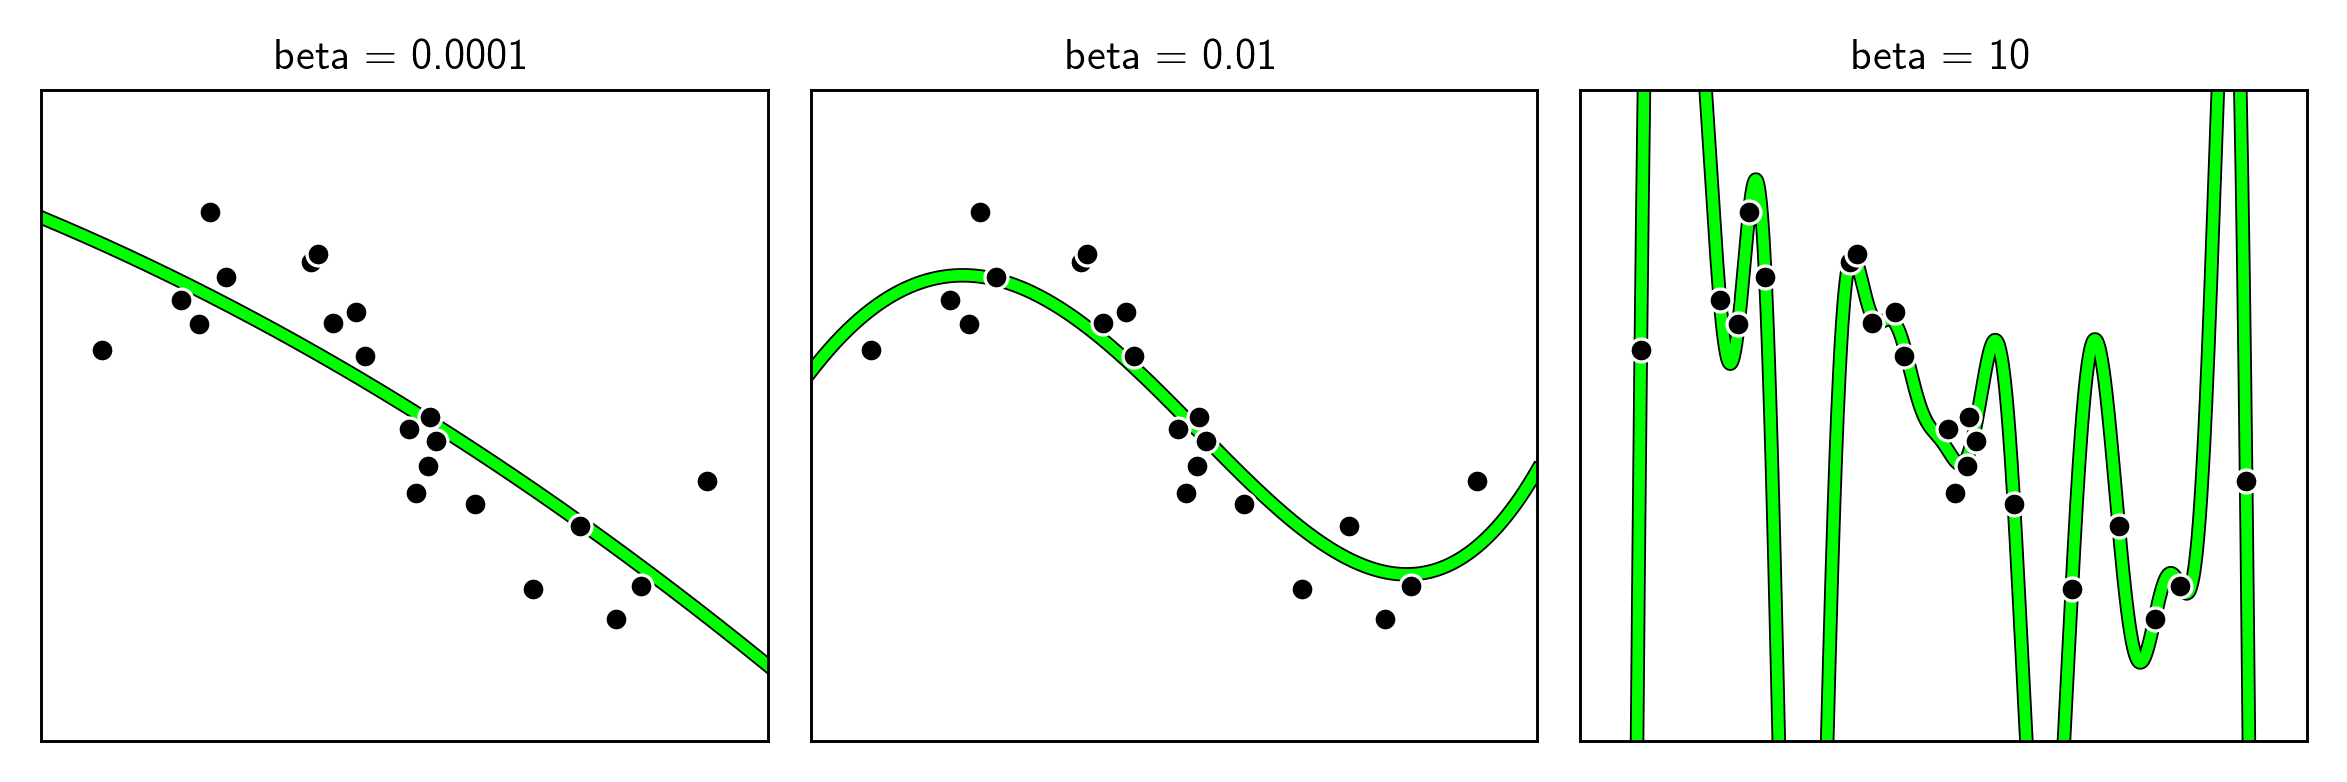

<IPython.core.display.Javascript object>


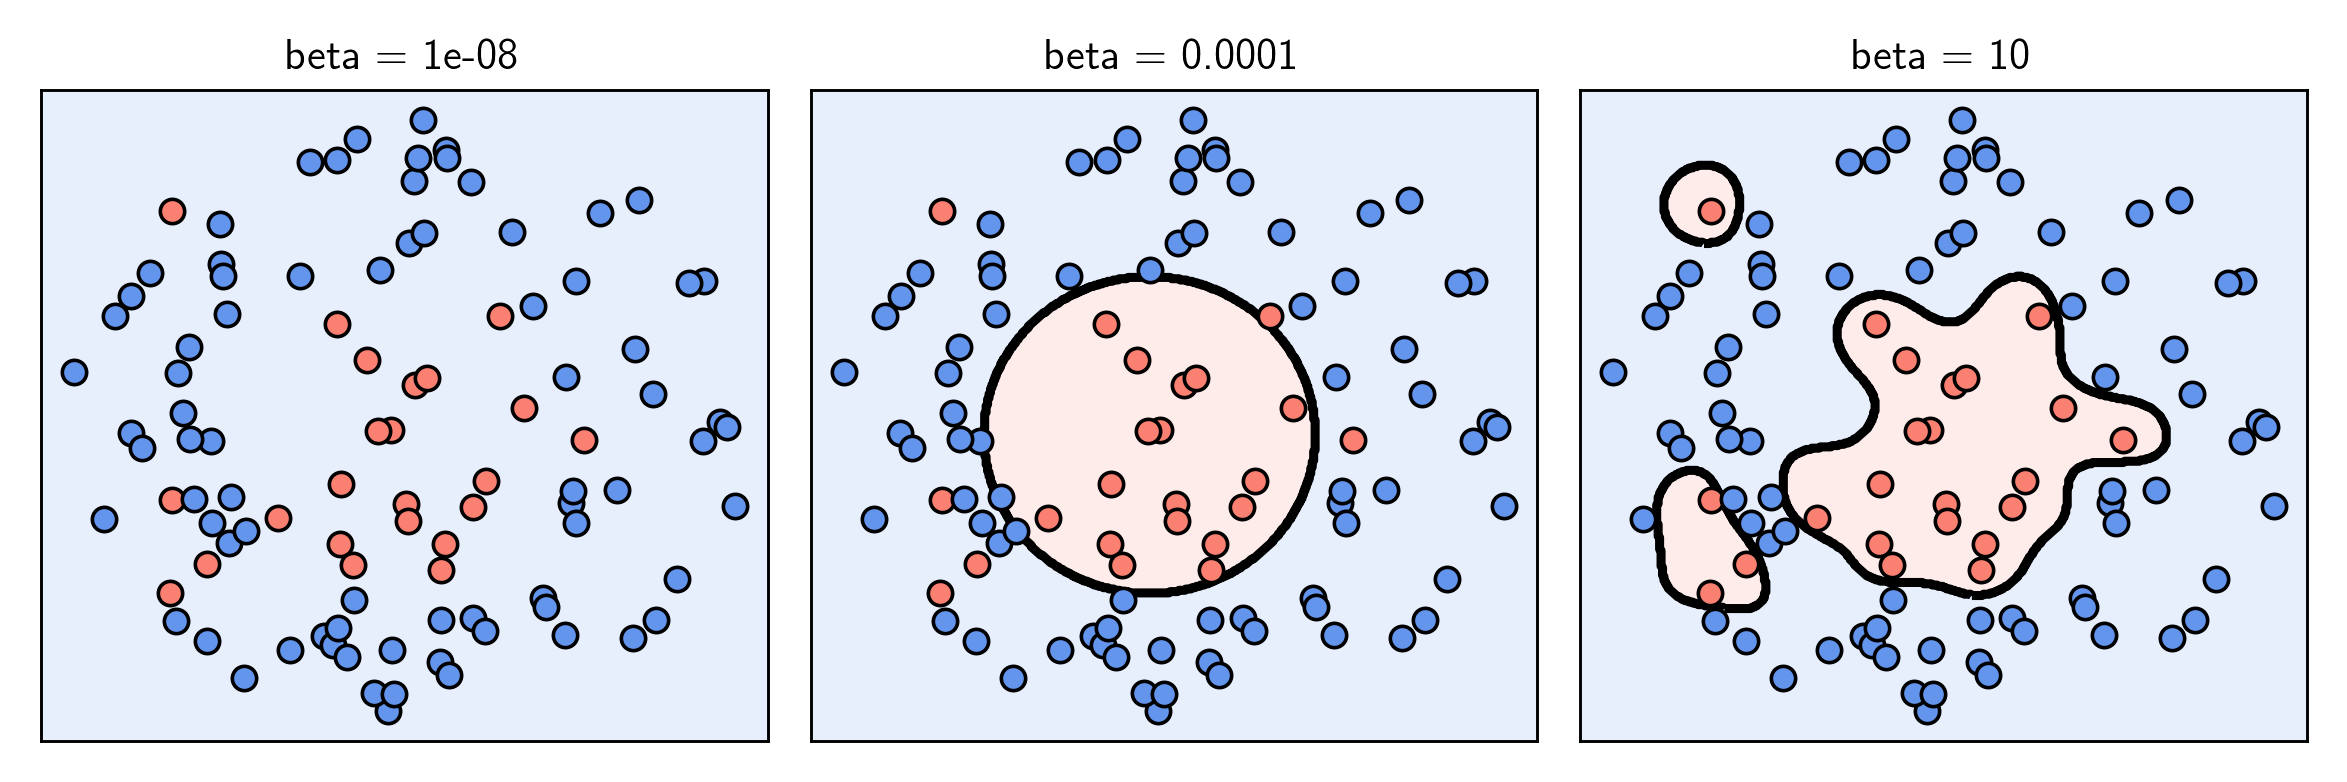

<IPython.core.display.Javascript object>


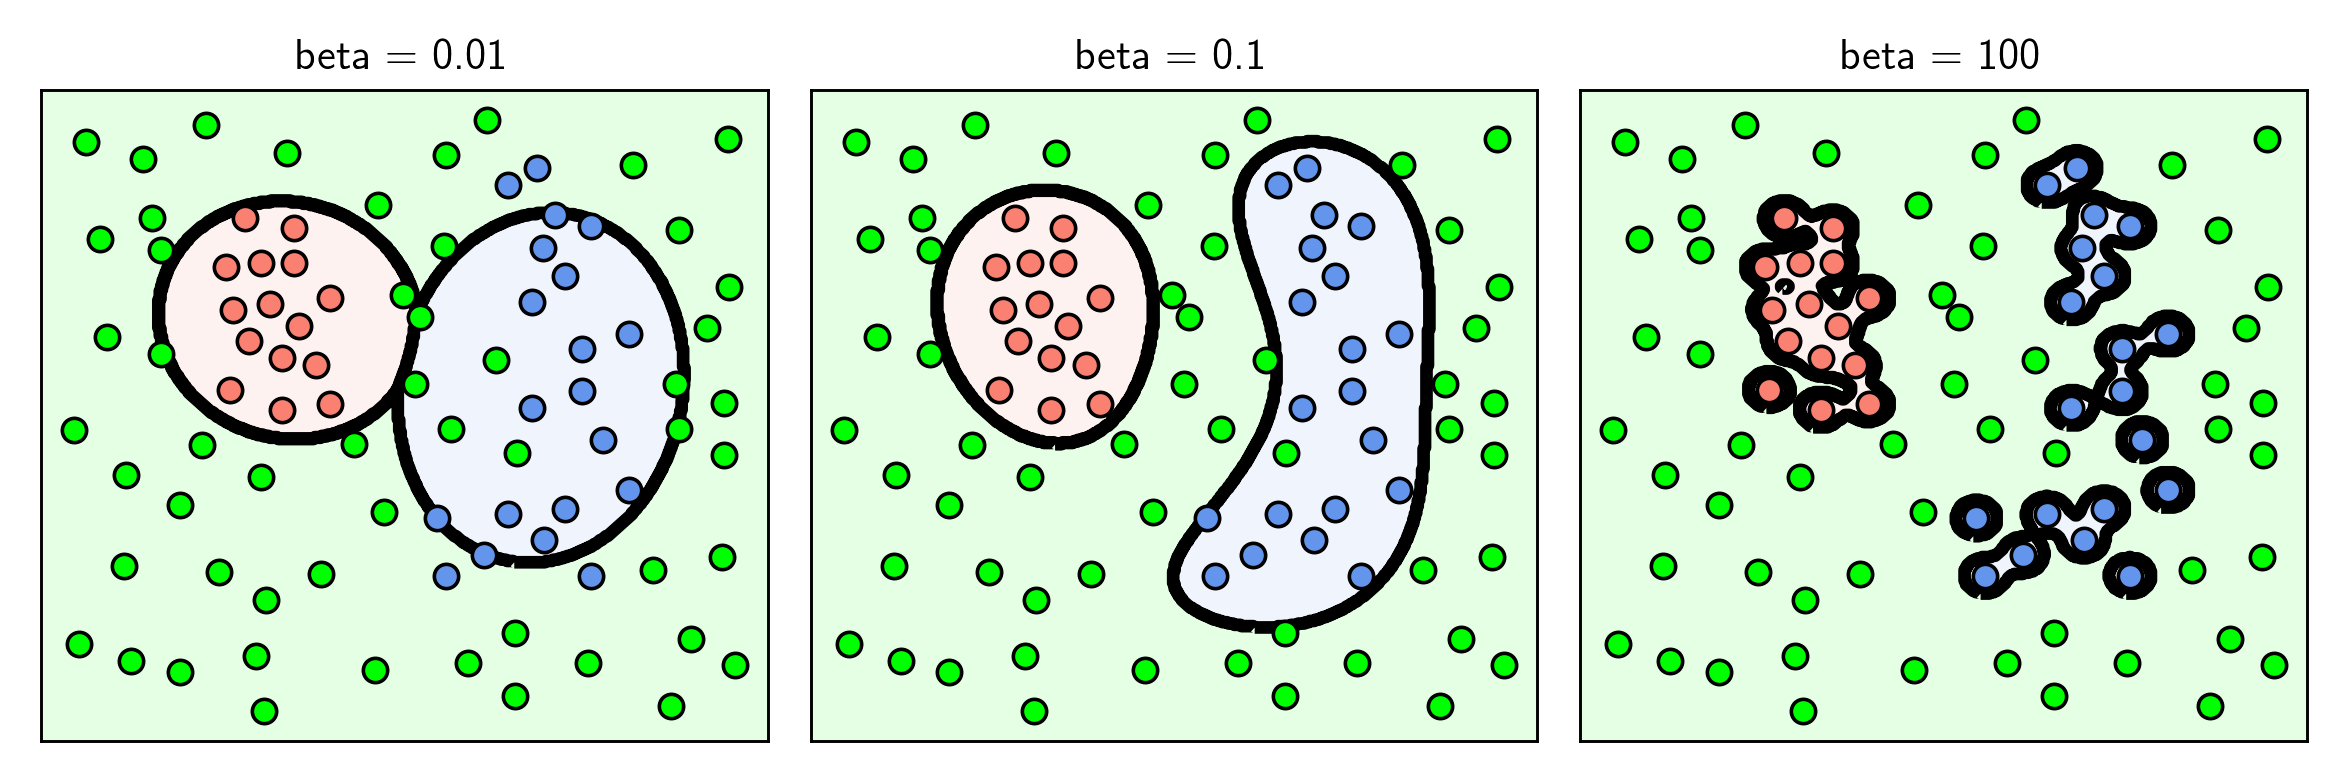

In [6]:
# This code cell will not be shown in the HTML version of this notebook
#### regression example ####
# import data
csvname = datapath + 'noisy_sin_sample.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = copy.deepcopy(data[:-1,:])
y = copy.deepcopy(data[-1:,:])

# range of degrees
betas = [10**(-4),10**(-2),10**(1)]

# loop over degrees and fit
runs = []
for d in betas:
    # initialize with input/output data
    mylib1 = nonlib.kernel_lib.classic_superlearn_setup.Setup(x,y)

    # perform preprocessing step(s) - especially input normalization
    mylib1.choose_normalizer(name = 'standard')

    # split into training and validation sets
    mylib1.make_train_valid_split(train_portion = 1)

    # choose cost
    mylib1.choose_cost(name = 'least_squares')

    # choose dimensions of fully connected multilayer perceptron layers
    mylib1.choose_kernel(name = 'gaussian',beta = d,scale = 0)

    # fit an optimization
    mylib1.fit(name = 'newtons_method',max_its = 1,verbose = False,epsilon = 10**(-10))

    # store
    runs.append(copy.deepcopy(mylib1))
    
# plot
demo = nonlib.kernel_visualizer.Visualizer(csvname)
labels = ['beta = ' + str(d) for d in betas]
demo.show_regression_runs(runs,labels = labels)

#### two-class classification example ####
# import data
csvname = datapath + 'new_circle_data.csv'

data = np.loadtxt(csvname,delimiter = ',')
x = copy.deepcopy(data[:-1,:])
y = copy.deepcopy(data[-1:,:])

# range of degrees
betas = [10**(-8),10**(-4),10**(1)]

# loop over degrees and fit
runs = []
for d in betas:
    # initialize with input/output data
    mylib1 = nonlib.kernel_lib.classic_superlearn_setup.Setup(x,y)

    # perform preprocessing step(s) - especially input normalization
    mylib1.choose_normalizer(name = 'standard')

    # choose cost
    mylib1.choose_cost(name = 'softmax')

    # choose dimensions of fully connected multilayer perceptron layers
    mylib1.choose_kernel(name = 'gaussian',beta = d,scale = 0)

    # fit an optimization
    mylib1.fit(name = 'newtons_method',max_its = 5,verbose = False,epsilon = 10**(-10))

    # store
    runs.append(copy.deepcopy(mylib1))
    
# plot results
demo = nonlib.kernel_visualizer.Visualizer(csvname)
labels = ['beta = ' + str(d) for d in betas]
demo.show_twoclass_runs(runs,labels = labels)


### multi-class classification ###
# import data
csvname = datapath + '2eggs_multiclass.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = copy.deepcopy(data[:-1,:])
y = copy.deepcopy(data[-1:,:])

# range of degrees
betas = [10**(-2),10**(-1),10**(2)]

# loop over degrees and fit
runs = []
for d in betas:
    # initialize with input/output data
    mylib1 = nonlib.kernel_lib.classic_superlearn_setup.Setup(x,y)

    # perform preprocessing step(s) - especially input normalization
    mylib1.choose_normalizer(name = 'standard')

    # choose cost
    mylib1.choose_cost(name = 'multiclass_softmax')

    # choose dimensions of fully connected multilayer perceptron layers
    mylib1.choose_kernel(name = 'gaussian',beta = d,scale = 0)

    # fit an optimization
    mylib1.fit(name = 'newtons_method',max_its = 5,verbose = False,epsilon = 10**(-6))

    # store
    runs.append(copy.deepcopy(mylib1))
    
# plot results
demo = nonlib.kernel_visualizer.Visualizer(csvname)
labels = ['beta = ' + str(d) for d in betas]
demo.show_multiclass_runs(runs,labels = labels)

##  Making predictions with kernelized models

- Our kernelized form of the general supervised model evaluated at the $p^{th}$ input $\mathbf{x}_p$ took the form $b + \mathbf{h}_p^T\boldsymbol{\omega}$, where $\mathbf{h}_p$ is the $p^{th}$ column of a $P\times P$ kernel $\mathbf{H}$.


- Notice how this involves the evaluation of every point in the training set against the input $\mathbf{x}_p$, e.g., the following form of $\mathbf{h}_p$ for a polynomial kernel

\begin{equation}
\mathbf{h}_p = 
\begin{bmatrix}
\left(1 + \mathbf{x}_1^T\mathbf{x}_p\right)^D + 1 \\
\left(1 + \mathbf{x}_2^T\mathbf{x}_p\right)^D + 1 \\
\vdots \\
\left(1 + \mathbf{x}_P^T\mathbf{x}_p^{\,}\right)^D + 1
\end{bmatrix}.
\end{equation}

- Assuming parameters $b$ and $\boldsymbol{\omega}$ have been fully tuned, the following model can be used for prediction purposes. 

\begin{equation}
\text{model}\left(\mathbf{x},b,\mathbf{z}\right) = b + \mathbf{h}^T\mathbf{z}
\end{equation}

- Here the kernelization $\mathbf{h}$ of the generic input $\mathbf{x}$ involves evaluation against *every point in the training set*. For instance, in the case of polynomials $\mathbf{h}$ is given as 

\begin{equation}
\mathbf{h} = 
\begin{bmatrix}
\left(1 + \mathbf{x}_1^T\mathbf{x}\right)^D + 1 \\
\left(1 + \mathbf{x}_2^T\mathbf{x}\right)^D + 1 \\
\vdots \\
\left(1 + \mathbf{x}_P^T\mathbf{x}^{\,}\right)^D + 1
\end{bmatrix}.
\end{equation}




- This necessity - to employ **every training point in making predictions** - is virtually unique to kernelized learners. 